## Adaline

In [1]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [2]:
repetitions = 200
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_bipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.04939221,  0.00106157,  1.0178681 ,  1.01709951,  0.01673595],
        [-0.00811043,  0.96747513, -0.0437246 ,  0.9743717 ,  0.00819262]]),
 array([[-1, -1, -1,  1, -1]]))

In [3]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [4]:
x_range = np.arange(-2, 4)
experiments_numb = 100

In [5]:
perceptrons = []
for w_range in list(np.linspace(0, 1, num=200))[1:]:
    p = Adaline(x_train, d_train, x_test, d_test, 0.0001, 0.4, (-w_range, w_range))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

199

,"weights range (-v, v)",epoch count
0,0.005025,79.29
1,0.010050,79.42
2,0.015075,79.42
3,0.020101,79.54
4,0.025126,79.36
...,...,...
194,0.979899,76.35
195,0.984925,75.38
196,0.989950,76.89
197,0.994975,78.14


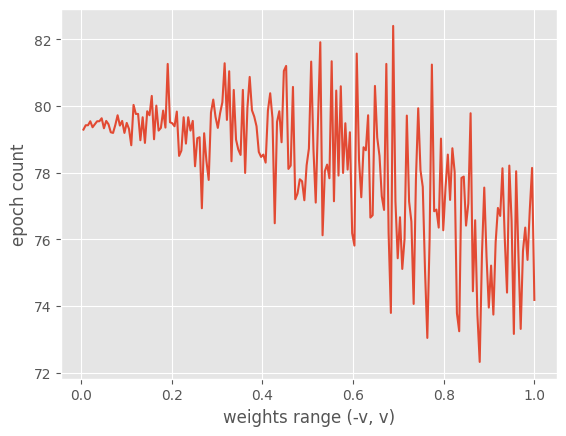

In [6]:
plt.plot([x.wrange[1] for x in perceptrons], [x.average_epoch_count for x in perceptrons])
plt.xlabel("weights range (-v, v)")
plt.ylabel("epoch count")
pd.DataFrame({"weights range (-v, v)":[x.wrange[1] for x in perceptrons], "epoch count":[x.average_epoch_count for x in perceptrons]})